In [1]:
# dependencies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import seaborn as sns
import statsmodels.api as sm
#sns.set_palette(sns.color_palette(['#851836', '#edbd17', ]))
#sns.set_style("darkgrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pandas.plotting import autocorrelation_plot

In [2]:
#reading data from file
#train = pd.read_csv(r'C:/Testing/DA/sales_train.csv')
train = pd.read_csv(r'C:/Testing/DA/Result/feature_eng.csv')
#C:\Testing\DA\Result\feature_eng.csv
test = pd.read_csv('C:/Testing/DA/test.csv')
sample_submission = pd.read_csv('C:/Testing/DA/sample_submission.csv')
items = pd.read_csv('C:/Testing/DA/items.csv')
item_cats = pd.read_csv('C:/Testing/DA/item_categories.csv')
shops = pd.read_csv('C:/Testing/DA/shops.csv')

In [3]:
#shops.head()

In [4]:
#merging data from train and items
all_data = train[['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day', 'total_sales', 'week', 'month', 'year', 'day', 'dayofweek_day', 'wrk_week']].merge(items[['item_name', 'item_id', 'item_category_id']], on='item_id', how='left')
#all_data

In [5]:
#merging data from train, items and items cat
all_data = all_data[['date', 'date_block_num', 'shop_id', 'item_id', 'item_name', 'item_price', 'item_cnt_day', 'total_sales', 'week', 'month', 'year', 'day', 'dayofweek_day', 'wrk_week', 'item_category_id']].merge(item_cats[['item_category_name', 'item_category_id']], on='item_category_id', how='left')
#all_data

In [6]:
#merging data from train, items, items cat and shops
all_data = all_data[['date', 'date_block_num', 'item_id', 'item_name', 'item_price', 'item_cnt_day', 'total_sales', 'week', 'month', 'year', 'day', 'dayofweek_day', 'wrk_week', 'item_category_id', 'item_category_name', 'shop_id']].merge(shops[['shop_name', 'shop_id']], on='shop_id', how='left')
#all_data

In [7]:
#conver the date to YYYY-MM-DD format
#all_data['date'] = pd.to_datetime(all_data.date, format='%d.%m.%Y')
#sort the values on date, shop_id and item_id
all_data = all_data.sort_values(by=['date', 'shop_id', 'item_id'])
#all_data

In [8]:
#all_data.to_csv ('C:\Testing\DA\Result\DA_Data.csv', index = False, header=True)
#all_data['total_sales'] = all_data['item_price'] * all_data['item_cnt_day']
#all_data

Text(0, 0.5, 'Total Sales')

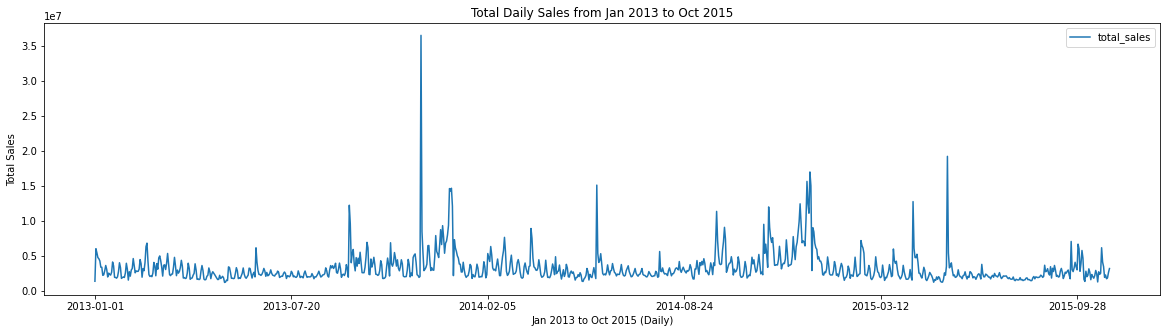

In [9]:
#plot daily line graph from jan 2013 to oct 2015
all_data_working = all_data[['date', 'total_sales']]
#all_data_working

aggregations = {'total_sales':'sum'}
all_data_by_date = all_data_working.groupby(['date'], as_index=False).agg(aggregations)
pd.set_option('display.float_format', '{:20,.2f}'.format)

ax = all_data_by_date.plot(x='date', y='total_sales', kind='line', figsize=(20,5))
ax.set_title('Total Daily Sales from Jan 2013 to Oct 2015')
ax.set_xlabel("Jan 2013 to Oct 2015 (Daily)")
ax.set_ylabel("Total Sales")

In [10]:
#all_data['week'] = all_data.date.dt.week
#all_data['month'] = all_data.date.dt.month
#all_data['year'] = all_data.date.dt.year
#all_data['day'] = all_data.date.dt.day_name()
#all_data['dayofweek_day'] = all_data.date.dt.dayofweek 
#all_data['weekday'] = np.where(all_data['dayofweek_day']<5, 'weekday', 'weekend')

all_data

,date,date_block_num,item_id,item_name,item_price,item_cnt_day,total_sales,week,month,year,day,dayofweek_day,wrk_week,item_category_id,item_category_name,shop_id,shop_name
0,2013-01-01,0,991,"3D Action Puzzle ""Динозавры"" Тиранозавр",99.00,1.00,99.00,1,1,2013,Tuesday,1,1,67,Подарки - Развитие,2,"Адыгея ТЦ ""Мега"""
1,2013-01-01,0,1472,"Assassin's Creed 3 [Xbox 360, русская версия]","2,599.00",1.00,"2,599.00",1,1,2013,Tuesday,1,1,23,Игры - XBOX 360,2,"Адыгея ТЦ ""Мега"""
2,2013-01-01,0,1905,"Bestseller. Grand Theft Auto: San Andreas [PC,...",249.00,1.00,249.00,1,1,2013,Tuesday,1,1,30,Игры PC - Стандартные издания,2,"Адыгея ТЦ ""Мега"""
3,2013-01-01,0,2920,Disney. LEGO Пираты Карибского моря (Essential...,599.00,2.00,"1,198.00",1,1,2013,Tuesday,1,1,21,Игры - PSP,2,"Адыгея ТЦ ""Мега"""
4,2013-01-01,0,3320,"FIFA 13 (с поддержкой PS Move) [PS3, русская в...","1,999.00",1.00,"1,999.00",1,1,2013,Tuesday,1,1,19,Игры - PS3,2,"Адыгея ТЦ ""Мега"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-31,33,20730,"Фигурка Scalers Wave 1 Alien 2""",499.00,1.00,499.00,44,10,2015,Saturday,5,148,72,Подарки - Фигурки,59,"Ярославль ТЦ ""Альтаир"""
2935845,2015-10-31,33,20866,Фигурка Tom Clancy's Splinter Cell Blacklist S...,699.00,1.00,699.00,44,10,2015,Saturday,5,148,72,Подарки - Фигурки,59,"Ярославль ТЦ ""Альтаир"""
2935846,2015-10-31,33,20949,Фирменный пакет майка 1С Интерес белый (34*42)...,5.00,1.00,5.00,44,10,2015,Saturday,5,148,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",59,"Ярославль ТЦ ""Альтаир"""
2935847,2015-10-31,33,21369,ХОББИТ: БИТВА ПЯТИ ВОИНСТВ (регион),169.00,1.00,169.00,44,10,2015,Saturday,5,148,40,Кино - DVD,59,"Ярославль ТЦ ""Альтаир"""


In [11]:
all_data_wrk = all_data
#all_data_wrk['wrk_week'] = np.where(all_data_wrk['year']==2013, all_data_wrk['week'], np.where(all_data_wrk['year']==2014, all_data_wrk['week']+52, all_data_wrk['week']+104))
#all_data_wrk

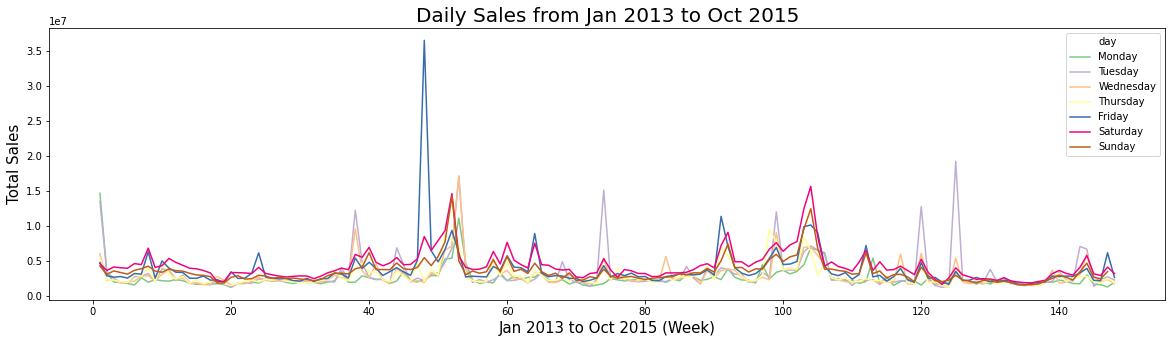

In [12]:
#plot weekly graph by year for better comparison
#all_data_weekday = all_data.groupby(['dayofweek_day', 'week', 'year'])[['total_sales']].agg('sum').reset_index()
#all_data_weekday = all_data_weekday.sort_values(['year', 'week', 'dayofweek_day'], ascending=[True, True, True])
#
#sns.lineplot(x='week', y='total_sales', hue='dayofweek_day', data = all_data_weekday, palette='Accent')
#plt.title("Total Sales", fontsize = 20)
#plt.rcParams['figure.figsize']=(10, 5)
#plt.xlabel("Year", fontsize = 15)
#plt.ylabel("Total Sales", fontsize = 15)
#plt.figure(figsize=(100, 6))
#plt.show()




all_data_weekday1 = all_data.loc[(all_data['day'] == 'Monday')]
all_data_weekday2 = all_data.loc[(all_data['day'] == 'Tuesday')]
all_data_weekday3 = all_data.loc[(all_data['day'] == 'Wednesday')]
all_data_weekday4 = all_data.loc[(all_data['day'] == 'Thursday')]
all_data_weekday5 = all_data.loc[(all_data['day'] == 'Friday')]
all_data_weekday6 = all_data.loc[(all_data['day'] == 'Saturday')]
all_data_weekday7 = all_data.loc[(all_data['day'] == 'Sunday')]

all_data_weekday1 = all_data_weekday1.groupby(['day', 'wrk_week'])[['total_sales']].agg('sum').reset_index()#.sort_values(['year', 'week'], ascending=[True,True])
all_data_weekday2 = all_data_weekday2.groupby(['day', 'wrk_week'])[['total_sales']].agg('sum').reset_index()#.sort_values(['year', 'week'], ascending=[True,True])
all_data_weekday3 = all_data_weekday3.groupby(['day', 'wrk_week'])[['total_sales']].agg('sum').reset_index()#.sort_values(['year', 'week'], ascending=[True,True])
all_data_weekday4 = all_data_weekday4.groupby(['day', 'wrk_week'])[['total_sales']].agg('sum').reset_index()#.sort_values(['year', 'week'], ascending=[True,True])
all_data_weekday5 = all_data_weekday5.groupby(['day', 'wrk_week'])[['total_sales']].agg('sum').reset_index()#.sort_values(['year', 'week'], ascending=[True,True])
all_data_weekday6 = all_data_weekday6.groupby(['day', 'wrk_week'])[['total_sales']].agg('sum').reset_index()#.sort_values(['year', 'week'], ascending=[True,True])
all_data_weekday7 = all_data_weekday7.groupby(['day', 'wrk_week'])[['total_sales']].agg('sum').reset_index()#.sort_values(['year', 'week'], ascending=[True,True])
all_data_weekday = pd.concat([all_data_weekday1, all_data_weekday2, all_data_weekday3, all_data_weekday4, all_data_weekday5, all_data_weekday6, all_data_weekday7])

plt.rcParams['figure.figsize']=(20, 5)
sns.lineplot(x='wrk_week', y = 'total_sales', data = all_data_weekday, hue='day' , palette = 'Accent')
plt.title("Daily Sales from Jan 2013 to Oct 2015", fontsize = 20)
plt.xlabel("Jan 2013 to Oct 2015 (Week)", fontsize = 15)
plt.ylabel("Total Sales", fontsize = 15)
plt.show()


#all_data_weekday = all_data.groupby(['dayofweek_day', 'week', 'year'])[['total_sales']].agg('sum').reset_index()
#all_data_weekday = all_data_weekday.sort_values(['dayofweek_day', 'week', 'year'], ascending=[True, True, True])
#all_data_weekday

#fig, ax = plt.subplots(figsize=(15,7))
#all_data.groupby(['dayofweek_day','week', 'year']).sum()['total_sales'].unstack().plot(ax=ax)
#ax.set_xlabel('Date')
#ax.set_ylabel('Amount of transactions')

In [13]:
#plot weekly line graph from jan 2013 to oct 2015
#all_data_working = all_data[['date', 'total_sales', 'weekday', 'week', 'year']]
#all_data_working

#all_data_working_weekday = all_data_working[all_data_working['weekday']=='weekday']
#all_data_working_weekend = all_data_working[all_data_working['weekday']=='weekend']


In [14]:
#plot weekly line graph from jan 2013 to oct 2015
#all_data_working = all_data[['date', 'total_sales', 'weekday', 'week', 'year']]

#all_data_working_weekday = all_data_working[all_data_working['weekday']=='weekday']
#all_data_working_weekend = all_data_working[all_data_working['weekday']=='weekend']

#aggregations = {'total_sales':'sum'}
#all_data_by_weekday = all_data_working_weekday.groupby(['year', 'week', 'weekday']).agg(aggregations)
#all_data_by_weekend = all_data_working_weekend.groupby(['year', 'week', 'weekday']).agg(aggregations)
#pd.set_option('display.float_format', '{:20,.2f}'.format)
#all_data_by_week
#ax = all_data_by_weekday['total_sales'].plot(figsize=(20,5))
#ax.set_title('Total sales from Jan 2013 to Oct 2015')
#ax.set_xlabel("Time (year-week)")
#ax.set_ylabel("Total Sales")

#ax = all_data_by_weekend['total_sales'].plot(figsize=(20,5), legend=True)
#ax.set_title('Total sales from Jan 2013 to Oct 2015')
#ax.set_xlabel("Time (year-week)")
#ax.set_ylabel("Total Sales")

Text(0, 0.5, 'Total Sales')

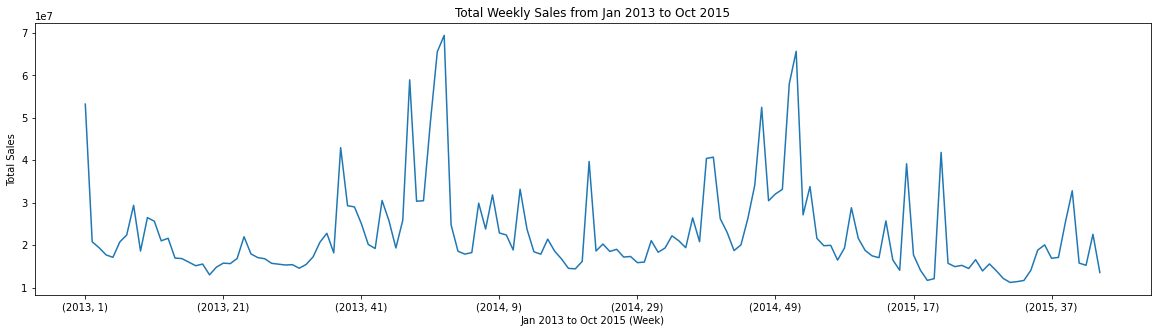

In [15]:
#plot weekly line graph from jan 2013 to oct 2015
all_data_working = all_data[['date', 'total_sales', 'week', 'year']]
#all_data_working

aggregations = {'total_sales':'sum'}
all_data_by_week = all_data_working.groupby(['year', 'week']).agg(aggregations)
pd.set_option('display.float_format', '{:20,.2f}'.format)
#all_data_by_week
ax = all_data_by_week['total_sales'].plot(figsize=(20,5))
ax.set_title('Total Weekly Sales from Jan 2013 to Oct 2015')
ax.set_xlabel("Jan 2013 to Oct 2015 (Week)")
ax.set_ylabel("Total Sales")

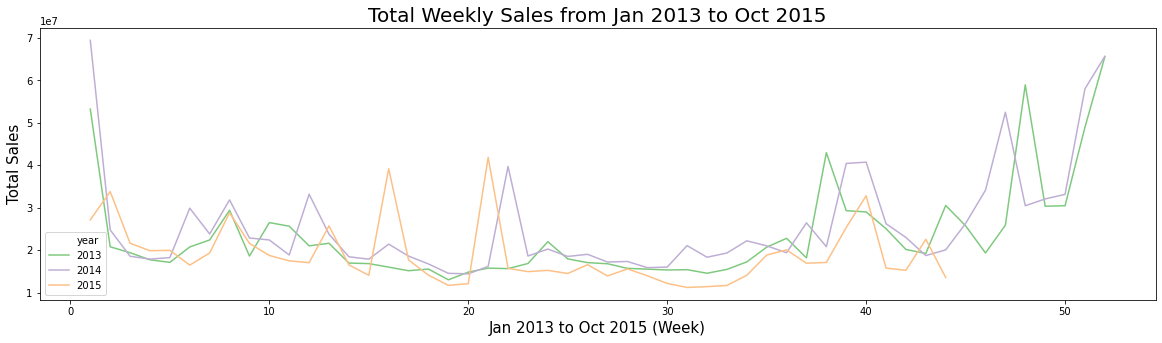

In [16]:

#plot weekly graph by year for better comparison
all_data_agg = all_data.groupby(['week', 'year'])[['total_sales']].agg('sum').reset_index()
#all_data_agg


plt.rcParams['figure.figsize']=(20, 5)
sns.lineplot(x='week', y='total_sales', hue='year', data = all_data_agg, palette='Accent')
plt.title("Total Weekly Sales from Jan 2013 to Oct 2015", fontsize = 20)
plt.xlabel("Jan 2013 to Oct 2015 (Week)", fontsize = 15)
plt.ylabel("Total Sales", fontsize = 15)
#plt.figure(figsize=(100, 6))
plt.show()

Text(0, 0.5, 'Total Sales')

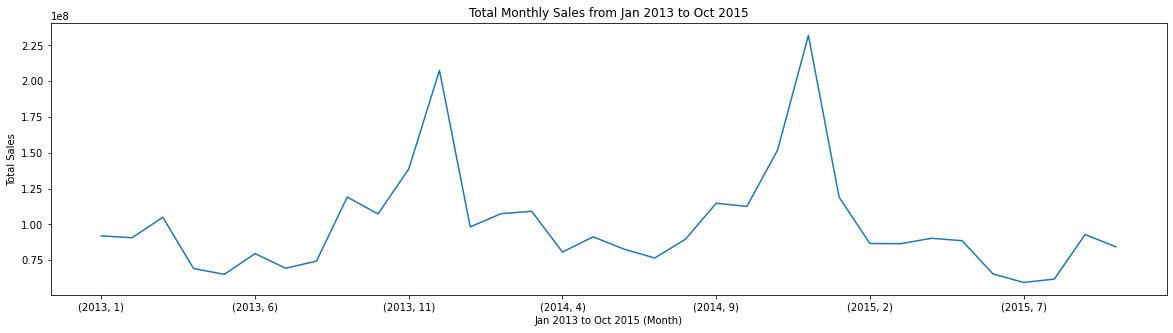

In [17]:
#plot monthly line graph from jan 2013 to oct 2015
all_data_working = all_data[['date', 'total_sales', 'month', 'year']]
#all_data_working

aggregations = {'total_sales':'sum'}
all_data_by_month = all_data_working.groupby(['year', 'month']).agg(aggregations)
pd.set_option('display.float_format', '{:20,.2f}'.format)
#all_data_by_week
ax = all_data_by_month['total_sales'].plot(figsize=(20,5))
ax.set_title('Total Monthly Sales from Jan 2013 to Oct 2015')
ax.set_xlabel("Jan 2013 to Oct 2015 (Month)")
ax.set_ylabel("Total Sales")

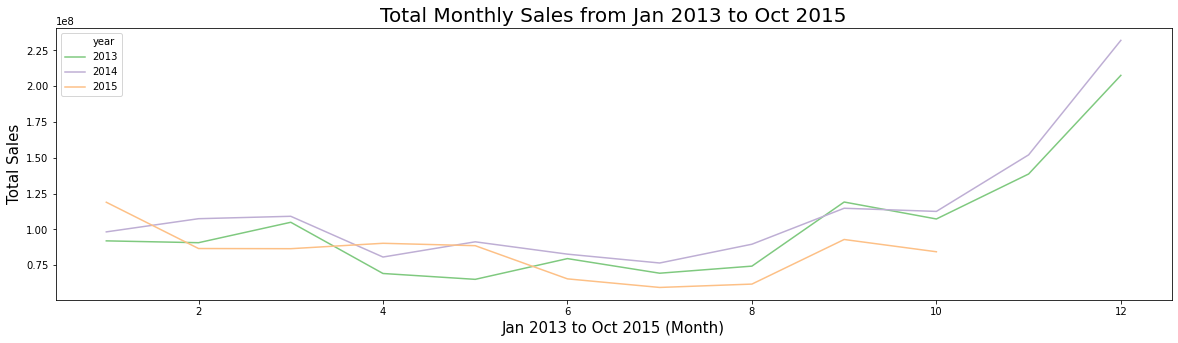

In [18]:
#plot monthly graph by year for better comparison
all_data_agg = all_data.groupby(['month', 'year'])[['total_sales']].agg('sum').reset_index()
#all_data_agg

sns.lineplot(x='month', y='total_sales', hue='year', data = all_data_agg, palette = 'Accent')
plt.rcParams['figure.figsize']=(20, 5)
plt.title("Total Monthly Sales from Jan 2013 to Oct 2015", fontsize = 20)
plt.xlabel("Jan 2013 to Oct 2015 (Month)", fontsize = 15)
plt.ylabel("Total Sales", fontsize = 15)
plt.show()

Text(0, 0.5, 'Total Sales')

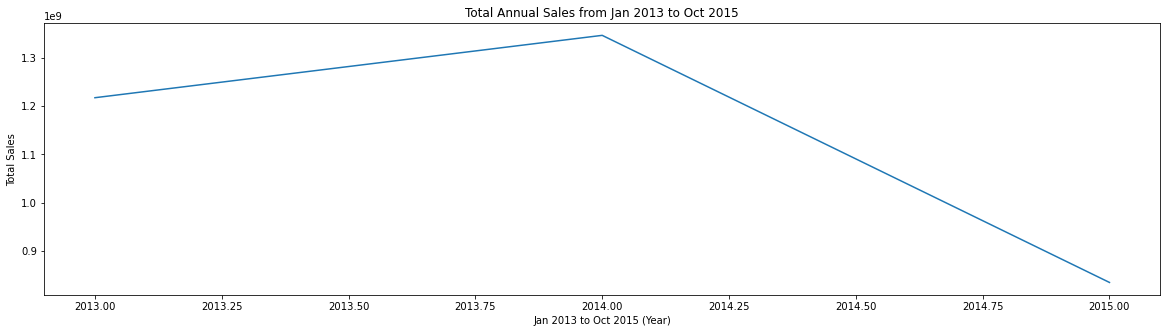

In [19]:
#plot monthly line graph from jan 2013 to oct 2015
all_data_working = all_data[['date', 'total_sales', 'year']]
#all_data_working

aggregations = {'total_sales':'sum'}
all_data_by_year = all_data_working.groupby(['year']).agg(aggregations)
pd.set_option('display.float_format', '{:20,.2f}'.format)
#all_data_by_week
ax = all_data_by_year['total_sales'].plot(figsize=(20,5))
ax.set_title('Total Annual Sales from Jan 2013 to Oct 2015')
ax.set_xlabel("Jan 2013 to Oct 2015 (Year)")
ax.set_ylabel("Total Sales")

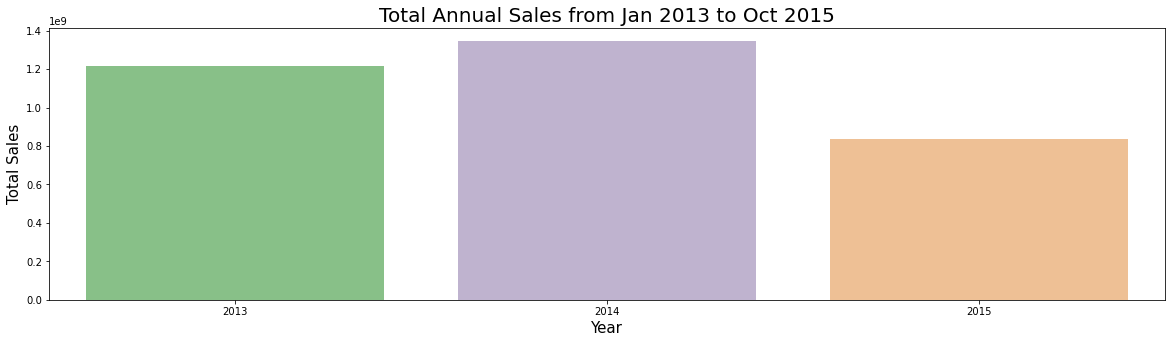

In [20]:
#plot monthly graph by year for better comparison
all_data_agg = all_data.groupby(['year'])[['total_sales']].agg('sum').reset_index()
#all_data_agg

sns.barplot(x='year', y='total_sales', data = all_data_agg, palette = 'Accent')
plt.title("Total Annual Sales from Jan 2013 to Oct 2015", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Sales", fontsize = 15)
plt.show()

In [21]:
#all_data

In [22]:
all_data_working = all_data[['date', 'item_cnt_day', 'week', 'year', 'day', 'dayofweek_day']]
all_data_working

aggregations = {'item_cnt_day':'sum'}
all_data_by_weekday = all_data_working.groupby(['year', 'week', 'day', 'dayofweek_day']).agg(aggregations)
pd.set_option('display.float_format', '{:20,.0f}'.format)
all_data_by_weekday.sort_values(by=['year', 'week', 'dayofweek_day', 'day'])

item_cnt_day
year week day       dayofweek_day                     
2013 1    Monday    0                           12,823
          Tuesday   1                           12,465
          Wednesday 2                            8,198
          Thursday  3                            7,422
          Friday    4                            6,617
...                                                ...
2015 44   Tuesday   1                            1,551
          Wednesday 2                            3,593
          Thursday  3                            1,589
          Friday    4                            2,274
          Saturday  5                            3,104

[1032 rows x 1 columns]

[Text(0, 0, '(2015, 16, Saturday, 5)'),
 Text(0, 0, '(2013, 1, Friday, 4)'),
 Text(0, 0, '(2013, 29, Thursday, 3)'),
 Text(0, 0, '(2014, 6, Monday, 0)'),
 Text(0, 0, '(2014, 34, Tuesday, 1)'),
 Text(0, 0, '(2015, 11, Tuesday, 1)'),
 Text(0, 0, '(2015, 40, Saturday, 5)'),
 Text(0, 0, '')]

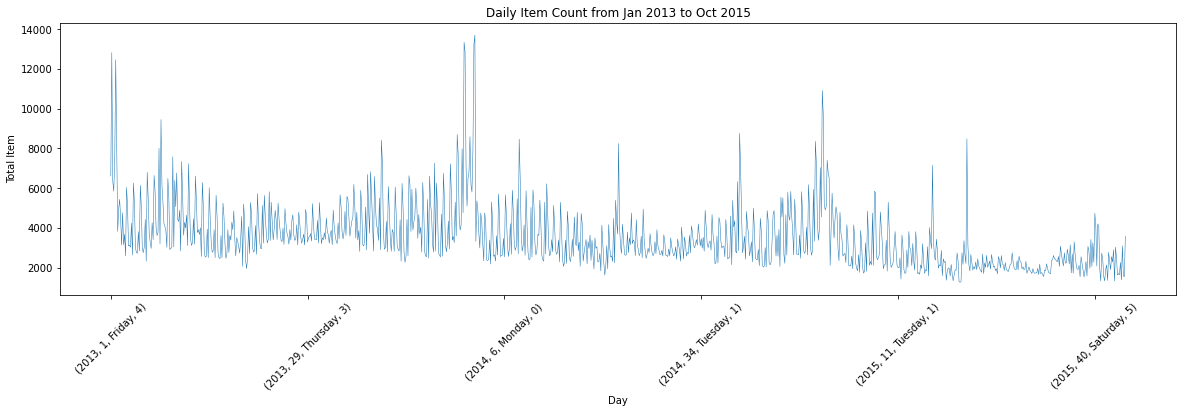

In [23]:
ax = all_data_by_weekday['item_cnt_day'].plot(linewidth=0.5)
ax.set_title('Daily Item Count from Jan 2013 to Oct 2015')
ax.set_xlabel("Day")
ax.set_ylabel("Total Item")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [24]:
all_data

,date,date_block_num,item_id,item_name,item_price,item_cnt_day,total_sales,week,month,year,day,dayofweek_day,wrk_week,item_category_id,item_category_name,shop_id,shop_name
0,2013-01-01,0,991,"3D Action Puzzle ""Динозавры"" Тиранозавр",99,1,99,1,1,2013,Tuesday,1,1,67,Подарки - Развитие,2,"Адыгея ТЦ ""Мега"""
1,2013-01-01,0,1472,"Assassin's Creed 3 [Xbox 360, русская версия]","2,599",1,"2,599",1,1,2013,Tuesday,1,1,23,Игры - XBOX 360,2,"Адыгея ТЦ ""Мега"""
2,2013-01-01,0,1905,"Bestseller. Grand Theft Auto: San Andreas [PC,...",249,1,249,1,1,2013,Tuesday,1,1,30,Игры PC - Стандартные издания,2,"Адыгея ТЦ ""Мега"""
3,2013-01-01,0,2920,Disney. LEGO Пираты Карибского моря (Essential...,599,2,"1,198",1,1,2013,Tuesday,1,1,21,Игры - PSP,2,"Адыгея ТЦ ""Мега"""
4,2013-01-01,0,3320,"FIFA 13 (с поддержкой PS Move) [PS3, русская в...","1,999",1,"1,999",1,1,2013,Tuesday,1,1,19,Игры - PS3,2,"Адыгея ТЦ ""Мега"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-31,33,20730,"Фигурка Scalers Wave 1 Alien 2""",499,1,499,44,10,2015,Saturday,5,148,72,Подарки - Фигурки,59,"Ярославль ТЦ ""Альтаир"""
2935845,2015-10-31,33,20866,Фигурка Tom Clancy's Splinter Cell Blacklist S...,699,1,699,44,10,2015,Saturday,5,148,72,Подарки - Фигурки,59,"Ярославль ТЦ ""Альтаир"""
2935846,2015-10-31,33,20949,Фирменный пакет майка 1С Интерес белый (34*42)...,5,1,5,44,10,2015,Saturday,5,148,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",59,"Ярославль ТЦ ""Альтаир"""
2935847,2015-10-31,33,21369,ХОББИТ: БИТВА ПЯТИ ВОИНСТВ (регион),169,1,169,44,10,2015,Saturday,5,148,40,Кино - DVD,59,"Ярославль ТЦ ""Альтаир"""


In [25]:
#all_data_working

In [26]:
#aggregations = {'total_sales':'sum'}
#all_data_by_date = all_data_working.groupby(['date'], as_index=False).agg(aggregations)

all_data_working = all_data
aggregations = {'total_sales':'sum'}
daily_data = all_data_working.groupby(['date'], as_index=False).agg(aggregations)
daily_data['lag_1'] = daily_data['total_sales'].shift(1)
daily_data['lag_2'] = daily_data['total_sales'].shift(2)
daily_data['lag_3'] = daily_data['total_sales'].shift(3)
daily_data['lag_4'] = daily_data['total_sales'].shift(4)
daily_data['lag_5'] = daily_data['total_sales'].shift(5)
daily_data['lag_6'] = daily_data['total_sales'].shift(6)
daily_data['lag_7'] = daily_data['total_sales'].shift(7)
daily_data

,date,total_sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,2013-01-01,"1,362,942",nan,nan,nan,nan,nan,nan,nan
1,2013-01-02,"6,020,512","1,362,942",nan,nan,nan,nan,nan,nan
2,2013-01-03,"5,436,480","6,020,512","1,362,942",nan,nan,nan,nan,nan
3,2013-01-04,"4,755,664","5,436,480","6,020,512","1,362,942",nan,nan,nan,nan
4,2013-01-05,"4,587,231","4,755,664","5,436,480","6,020,512","1,362,942",nan,nan,nan
...,...,...,...,...,...,...,...,...,...
1029,2015-10-27,"2,261,143","1,922,156","3,457,825","4,108,111","6,161,367","2,512,410","2,346,552","2,715,847"
1030,2015-10-28,"1,722,150","2,261,143","1,922,156","3,457,825","4,108,111","6,161,367","2,512,410","2,346,552"
1031,2015-10-29,"1,859,613","1,722,150","2,261,143","1,922,156","3,457,825","4,108,111","6,161,367","2,512,410"
1032,2015-10-30,"2,620,837","1,859,613","1,722,150","2,261,143","1,922,156","3,457,825","4,108,111","6,161,367"


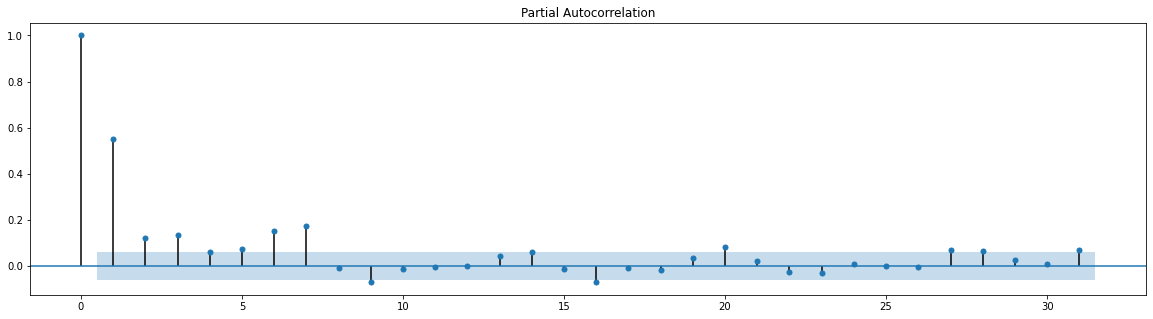

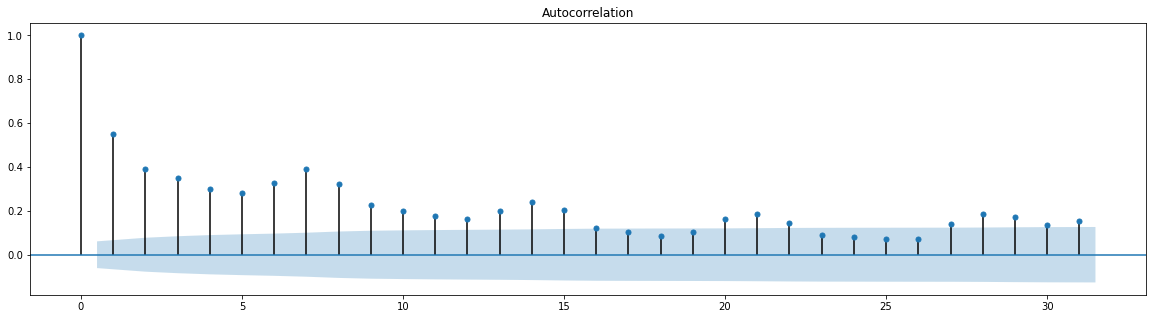

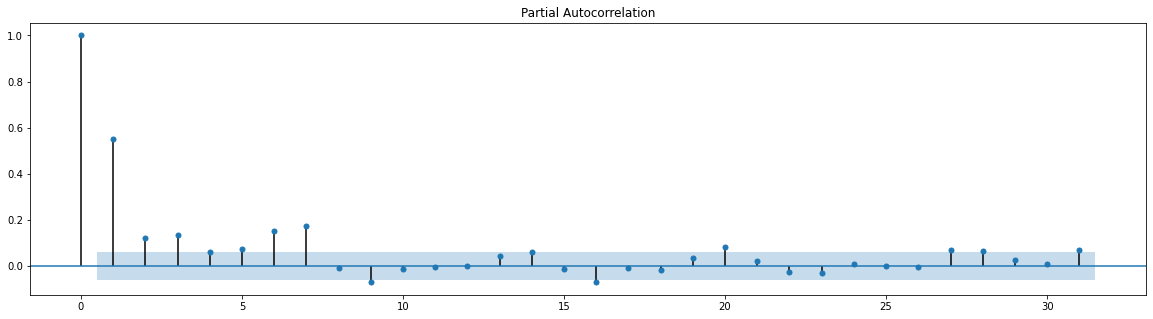

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(daily_data['total_sales'])
plot_pacf(daily_data['total_sales'])

In [28]:
#to group the data by date and shop_id and do lagging

#all_data_working = all_data
#all_data_working['lag1'] = all_data_working.groupby(['date', 'shop_id'])['total_sales'].shift(1)
#all_data_working['lag2'] = all_data_working.groupby(['date', 'shop_id'])['total_sales'].shift(2)
#all_data_working['lag3'] = all_data_working.groupby(['date', 'shop_id'])['total_sales'].shift(3)
#all_data_working['lag4'] = all_data_working.groupby(['date', 'shop_id'])['total_sales'].shift(4)
#all_data_working['lag5'] = all_data_working.groupby(['date', 'shop_id'])['total_sales'].shift(5)
#all_data_working['lag6'] = all_data_working.groupby(['date', 'shop_id'])['total_sales'].shift(6)
#all_data_working['lag7'] = all_data_working.groupby(['date', 'shop_id'])['total_sales'].shift(7)
#all_data_working.to_csv ('C:\Testing\DA\Result\Week_Data.csv', index = False, header=True)

#all_data_working['seq'].max()
#all_data_working.loc[all_data_working['seq']==1022]
#all_data_working.loc[all_data_working['date']=='2014-12-30']

In [29]:
daily_data

,date,total_sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,2013-01-01,"1,362,942",nan,nan,nan,nan,nan,nan,nan
1,2013-01-02,"6,020,512","1,362,942",nan,nan,nan,nan,nan,nan
2,2013-01-03,"5,436,480","6,020,512","1,362,942",nan,nan,nan,nan,nan
3,2013-01-04,"4,755,664","5,436,480","6,020,512","1,362,942",nan,nan,nan,nan
4,2013-01-05,"4,587,231","4,755,664","5,436,480","6,020,512","1,362,942",nan,nan,nan
...,...,...,...,...,...,...,...,...,...
1029,2015-10-27,"2,261,143","1,922,156","3,457,825","4,108,111","6,161,367","2,512,410","2,346,552","2,715,847"
1030,2015-10-28,"1,722,150","2,261,143","1,922,156","3,457,825","4,108,111","6,161,367","2,512,410","2,346,552"
1031,2015-10-29,"1,859,613","1,722,150","2,261,143","1,922,156","3,457,825","4,108,111","6,161,367","2,512,410"
1032,2015-10-30,"2,620,837","1,859,613","1,722,150","2,261,143","1,922,156","3,457,825","4,108,111","6,161,367"


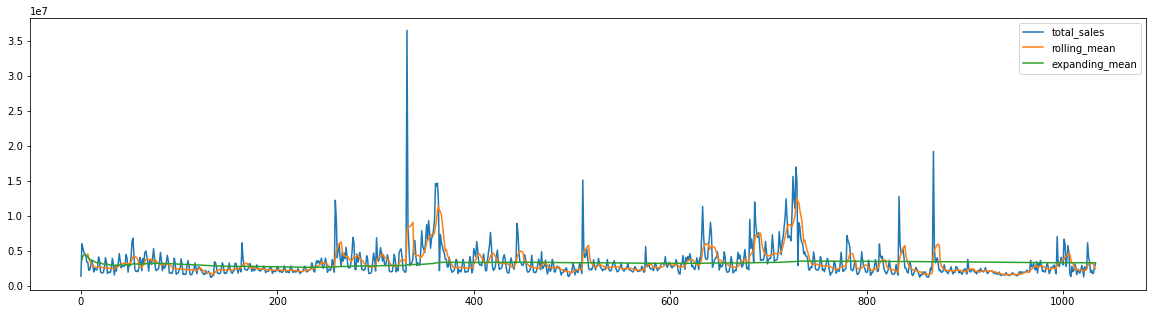

In [30]:
daily_data['rolling_mean'] = daily_data['total_sales'].rolling(window=7).mean()
daily_data['expanding_mean'] = daily_data['total_sales'].expanding(2).mean()
daily_data[['total_sales', 'rolling_mean', 'expanding_mean']].plot(figsize=(20, 5))

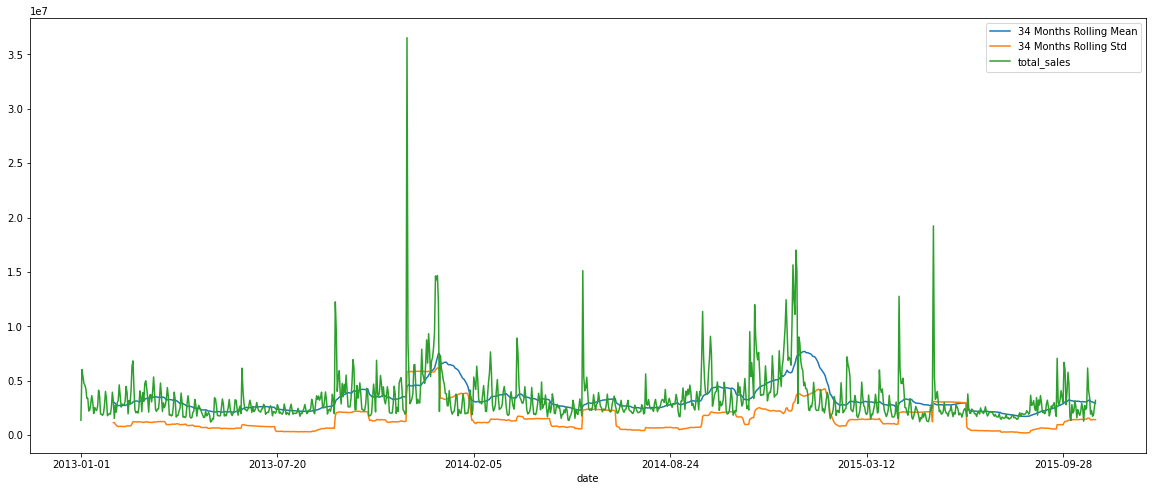

In [31]:
#rolling statistic to see the variation of mean and standard deviation
plt.rcParams['figure.figsize']=(20, 8)
daily_data = all_data.groupby(['date']).agg(aggregations)
timeseries = daily_data['total_sales']
timeseries.rolling(34).mean().plot(label='34 Months Rolling Mean')
timeseries.rolling(34).std().plot(label='34 Months Rolling Std')
timeseries.plot()
plt.legend()


<Figure size 1440x576 with 0 Axes>

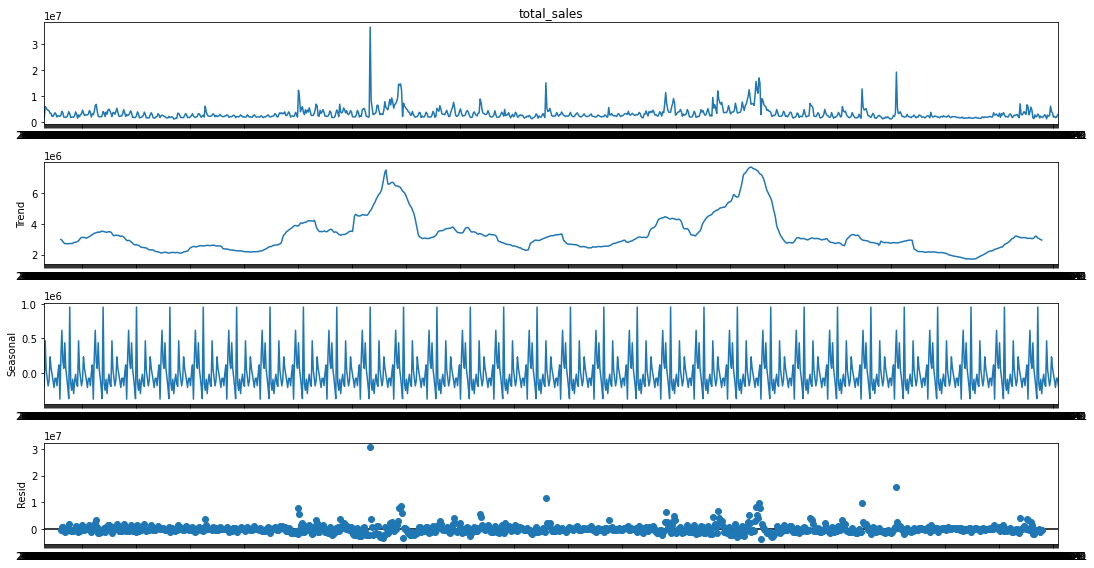

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(daily_data['total_sales'], period=34)  
figure = plt.figure()  
figure = decomposition.plot()  
figure.set_size_inches(15, 8)
#the data is seasonal and there is an upward trend at the year end

In [33]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(daily_data['total_sales'])
print ('ADF Test:')
labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

for value,label in zip(test_result,labels):
    print (label+': '+str(value))
if test_result [1] <= 0.05:
    print ("Reject null hypothesis and data is stationary")
else:
    print ("Fail to reject H0 thereby data is non-stationary ")


ADF Test:
ADF Statistic: -6.018219617770953
p-value: 1.5156183061906934e-07
No. of Lags Used: 8
Number of Observations Used: 1025
Reject null hypothesis and data is stationary


In [34]:
model = sm.tsa.statespace.SARIMAX(daily_data['total_sales'],order=(0,1,0), seasonal_order=(1,1,1,12))
ARIMAresult = model.fit()
print (ARIMAresult.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                          total_sales   No. Observations:                 1034
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood              -16383.656
Date:                              Sun, 13 Dec 2020   AIC                          32773.312
Time:                                      13:04:07   BIC                          32788.098
Sample:                                  01-01-2013   HQIC                         32778.926
                                       - 10-31-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0584      0.078     -0.749      0.454      -0.211       0.094
ma.S.L12      -0.97

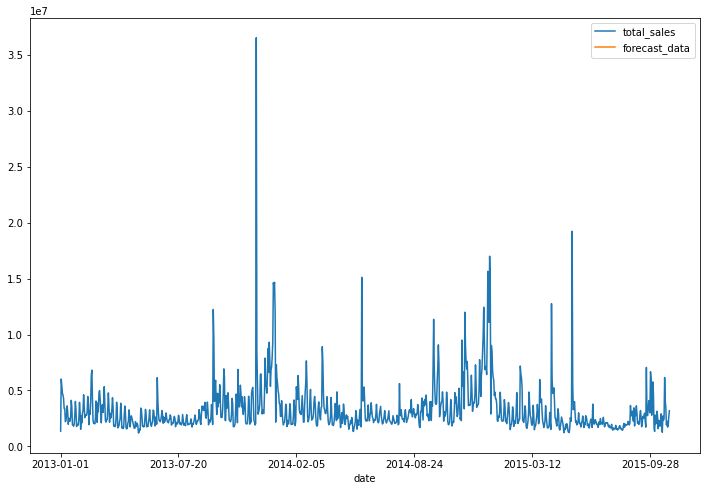

In [35]:
daily_data['forecast_data'] = ARIMAresult.predict(start = 800, end= 1200, dynamic= True)  
daily_data [['total_sales','forecast_data']]. plot (figsize= (12,8))

In [36]:
all_data
#all_data.to_csv (r'C:\Testing\DA\Result\feature_eng.csv', index = False, header=True)

,date,date_block_num,item_id,item_name,item_price,item_cnt_day,total_sales,week,month,year,day,dayofweek_day,wrk_week,item_category_id,item_category_name,shop_id,shop_name
0,2013-01-01,0,991,"3D Action Puzzle ""Динозавры"" Тиранозавр",99,1,99,1,1,2013,Tuesday,1,1,67,Подарки - Развитие,2,"Адыгея ТЦ ""Мега"""
1,2013-01-01,0,1472,"Assassin's Creed 3 [Xbox 360, русская версия]","2,599",1,"2,599",1,1,2013,Tuesday,1,1,23,Игры - XBOX 360,2,"Адыгея ТЦ ""Мега"""
2,2013-01-01,0,1905,"Bestseller. Grand Theft Auto: San Andreas [PC,...",249,1,249,1,1,2013,Tuesday,1,1,30,Игры PC - Стандартные издания,2,"Адыгея ТЦ ""Мега"""
3,2013-01-01,0,2920,Disney. LEGO Пираты Карибского моря (Essential...,599,2,"1,198",1,1,2013,Tuesday,1,1,21,Игры - PSP,2,"Адыгея ТЦ ""Мега"""
4,2013-01-01,0,3320,"FIFA 13 (с поддержкой PS Move) [PS3, русская в...","1,999",1,"1,999",1,1,2013,Tuesday,1,1,19,Игры - PS3,2,"Адыгея ТЦ ""Мега"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-31,33,20730,"Фигурка Scalers Wave 1 Alien 2""",499,1,499,44,10,2015,Saturday,5,148,72,Подарки - Фигурки,59,"Ярославль ТЦ ""Альтаир"""
2935845,2015-10-31,33,20866,Фигурка Tom Clancy's Splinter Cell Blacklist S...,699,1,699,44,10,2015,Saturday,5,148,72,Подарки - Фигурки,59,"Ярославль ТЦ ""Альтаир"""
2935846,2015-10-31,33,20949,Фирменный пакет майка 1С Интерес белый (34*42)...,5,1,5,44,10,2015,Saturday,5,148,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",59,"Ярославль ТЦ ""Альтаир"""
2935847,2015-10-31,33,21369,ХОББИТ: БИТВА ПЯТИ ВОИНСТВ (регион),169,1,169,44,10,2015,Saturday,5,148,40,Кино - DVD,59,"Ярославль ТЦ ""Альтаир"""


In [37]:
#all_data['lag_1'] = all_data['item_cnt_day'].shift(1)
#all_data['lag_2'] = all_data['item_cnt_day'].shift(2)
#all_data['lag_3'] = all_data['item_cnt_day'].shift(3)
#all_data['lag_4'] = all_data['item_cnt_day'].shift(4)
#all_data['lag_5'] = all_data['item_cnt_day'].shift(5)
#all_data['lag_6'] = all_data['item_cnt_day'].shift(6)
#all_data['lag_7'] = all_data['item_cnt_day'].shift(7)
#all_data

In [38]:
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
#plot_acf(all_data['item_cnt_day'], lags=10)
#plot_pacf(all_data['item_cnt_day'], lags=10)

In [39]:
#all_data['rolling_mean'] = all_data['item_cnt_day'].rolling(window=7).mean()
#all_data

In [40]:
#all_data['expanding_mean'] = all_data['item_cnt_day'].expanding(2).mean()
#all_data
#all_data.to_csv ('C:\Testing\DA\Result\DA_Full_Data.csv', index = False, header=True)